In [1]:
"""
juliamap(c,z; maxiter) :
  Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero
if the iteration never diverges.

 - c : complex constant definining the set
 - z : complex number being iterated
 - maxiter : maximum iteration number, defaults to 100
"""
function juliamap(c, z; maxiter=100)
    for n = 1:maxiter
        z = z^2 + c
        if abs(z) > 2
            return n
        end
    end
    return 0
end

@doc juliamap

juliamap(c,z; maxiter) :   Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero if the iteration never diverges.

  * c : complex constant definining the set
  * z : complex number being iterated
  * maxiter : maximum iteration number, defaults to 100


In [2]:
# Specialize juliamap to c=0
j0(z) = juliamap(0,z)

# Evaluate j0 on single complex points. Note: im is the imaginary unit in Julia
print( j0( complex(1.1, 0.3) ) )  # Recommended construction for complex numbers
print( j0( 1.1 + 0.3im ) )       # Equivalent result, but constructs z in 2 steps

# Evaluate j0 across an array - the . notation automatically vectorizes any function
a = linspace(complex(0.1,0.3), complex(1.5,0.3), 100)
print( j0.(a) )

33

[0

, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]

This code is creating an array of complex values and then vectorizing the julia function applied to each value in the array.

In [3]:
# Create a complex plane
function complex_plane(xmin=-2, xmax=2, ymin=-2, ymax=2; xpoints=1000, ypoints=1000)
    # y is a column vector
    y = linspace(ymin, ymax, ypoints)

    # x uses a transpose, yielding a row vector
    x = linspace(xmin, xmax, xpoints)'

    # z uses broadcasted addition and multiplication to create a plane
    z = x .+ y.*im;

    # The final line of a block is treated as the return value, in the absence
    # of an explicit return statement
end

complex_plane (generic function with 5 methods)

In [4]:
# The vectorized function can be applied directly to the plane
@time cplane = complex_plane()
@time j0p = j0.(cplane)

  0.314091 seconds (156.15 k allocations: 23.027 MiB, 23.87% gc time)


  0.267840 seconds (76.03 k allocations: 11.698 MiB)


1000×1000 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1

This code works similarly to a code in Matlab. We create vectors x and y then z is the itemized sum and multiplication.
The difference between the comma and the semicolon in the list of arguments is that commas separate arguments of the same type. Semicolons separate postional arguments from keyword arguments.

In [5]:
mutable struct ComplexPlane
    x :: LinSpace{Float64}
    y :: LinSpace{Float64}
    z :: Array{Number,2}
    
    function ComplexPlane(xmin=-2, xmax=2, ymin=-2, ymax=2;
                            xpoints=1000, ypoints=1000)
        x = linspace(xmin, xmax, xpoints)
        y = linspace(ymin, ymax, ypoints)
        z = x' .+ y.*im
        new(x,y,z)
    end
end

In [6]:
cplane = ComplexPlane(xpoints=200,ypoints=200);
typeof(cplane)

ComplexPlane

In [7]:
print(typeof(cplane.x))
cplane.z = j0.(cplane.z)

LinSpace{Float64}

200×200 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

The constructor is equivalent to methods using the same name as the struct. The mutable struct is like a Python class in that it has attributes and a constructor method.

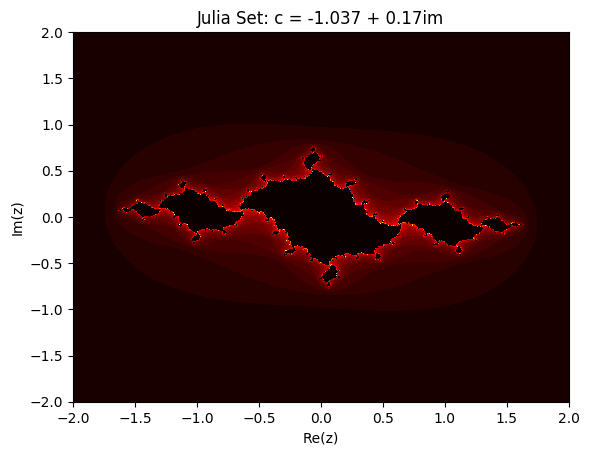

In [8]:
c = -1.037 + 0.17im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")

In [0]:
c = -0.7269+0.1889im                 #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")

In [0]:
c = -.8im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")

In [0]:
c = -.8+.156im                 #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")

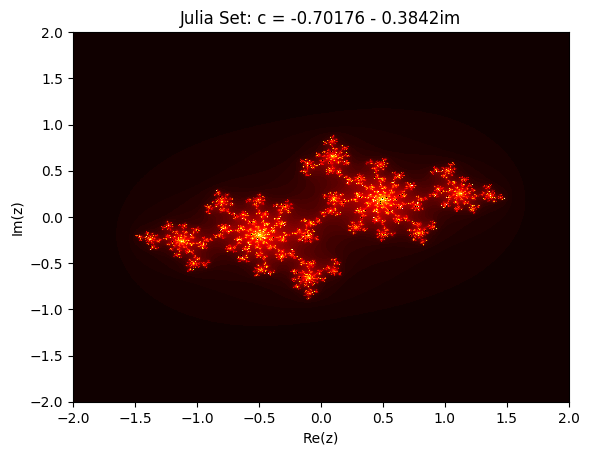

In [9]:
c = -0.70176-0.3842im               #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")

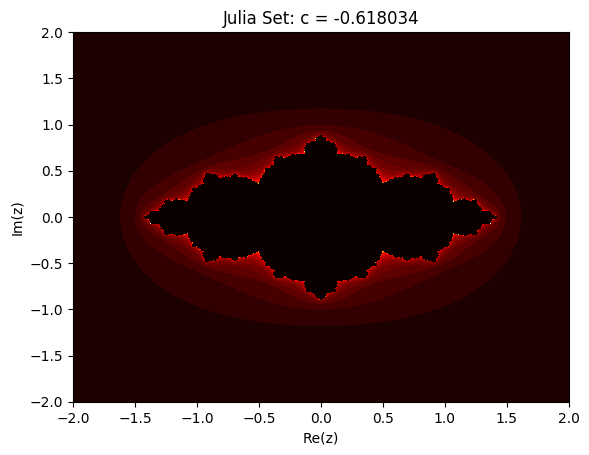

In [8]:
c = -.618034                 #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")